In [1]:
from sidekit.features_extractor import plp
from pydub.utils import mediainfo
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import librosa

%matplotlib inline

C:\Users\admin\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\admin\anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [24]:
audio_file_path = r"C:\Users\admin\Documents\AI\data\voice_recognition\train\0\1.wav"
sample_rate = int(mediainfo(audio_file_path)['sample_rate'])

In [25]:
y, sr = librosa.load(path=audio_file_path, sr=sample_rate)

print("y_mel shape: ", np.shape(y))

y_mel shape:  (441344,)
y_rasta_plp shape:  (441344,)
y_plp shape:  (441344,)


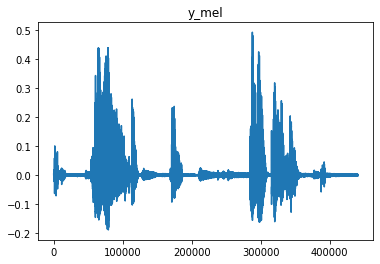

max_value:  0.493515
min_value:  -0.18936157


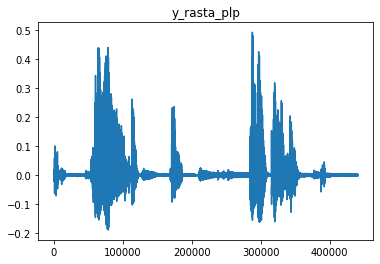

max_value:  0.493515
min_value:  -0.18936157


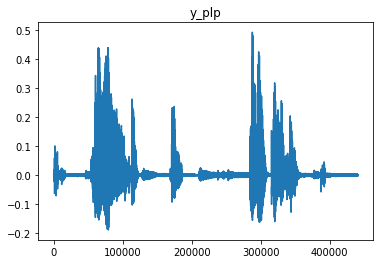

max_value:  0.493515
min_value:  -0.18936157


In [26]:
plt.plot(y)
plt.title('y_mel')
plt.show()
print('max_value: ', np.max(y))
print('min_value: ', np.min(y))

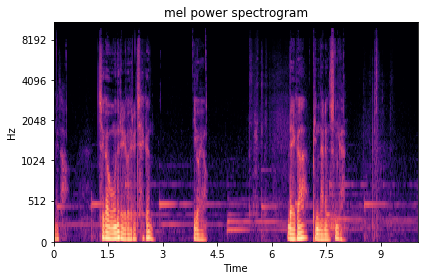

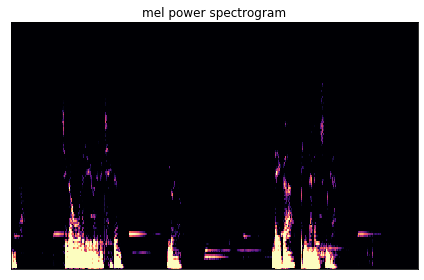

In [27]:
# mel-spectrogram
s_mel = librosa.feature.melspectrogram(y=y, sr=sr)
s_log_mel = librosa.amplitude_to_db(S=s_mel)

librosa.display.specshow(librosa.power_to_db(s_mel, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

min_level_db = -100

def _normalize(s):
    return np.clip((s - min_level_db) / -min_level_db, 0, 1)

norm_melspectro = _normalize(s_log_mel)
librosa.display.specshow(data=norm_melspectro, sr=sr)
plt.title('mel power spectrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

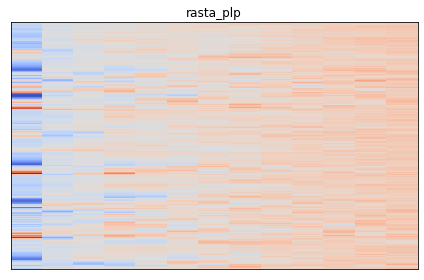

shape of s_rasta_plp:  (999, 13)
max value in s_rasta_plp[0]:  1.117254912764454
min value in s_rasta_plp[0]:  -1.7001141909831337


In [28]:
# rasta-plp
s_rasta_plp = plp(y, fs=sr)

librosa.display.specshow(data=s_rasta_plp[0], sr=sr)
plt.title('rasta_plp')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

print("shape of s_rasta_plp: ", np.shape(s_rasta_plp[0]))
print("max value in s_rasta_plp[0]: ", np.max(s_rasta_plp[0]))
print("min value in s_rasta_plp[0]: ", np.min(s_rasta_plp[0]))

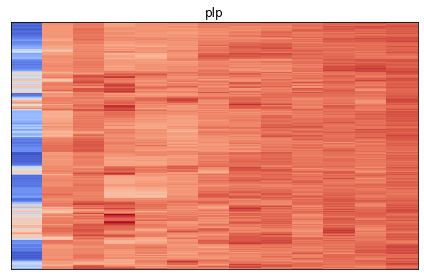

shape of s_plp:  (999, 13)
max value in s_plp[0]:  0.5492169082849555
min value in s_plp[0]:  -3.4884910562090083


In [29]:
# plp
s_plp = plp(y, fs=sr, rasta=False)

librosa.display.specshow(data=s_plp[0], sr=sr)
plt.title('plp')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

print("shape of s_plp: ", np.shape(s_plp[0]))
print("max value in s_plp[0]: ", np.max(s_plp[0]))
print("min value in s_plp[0]: ", np.min(s_plp[0]))

In [12]:
#lpc
s_lpc = librosa.lpc(y, order=10)
print(s_lpc)


[  1.         -3.9808064   8.388707  -12.648287   15.132746  -15.346188
  13.451524   -9.834362    5.603503   -2.2228985   0.4588122]
